Directions: The exam is open book, notes, course materials, and internet, BUT if you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code: during the exam time, with students in other sections of the course, by using the solutions to exams from previous semesters, or online answer tools such as Chegg, CourseHero, ChatGPT, etc. This is a zero tolerance policy and all suspected honor code violations will be reported. Just as with all course assignments, you should submit this exam to Gradescope as a Jupyter Notebook with the ipynb file extension. To receive full credit, you should show and run all of your code used to answer each question.

**Check your file on Gradescope to ensure that it is the file that you intended to submit! No completed work ill be accepted after the due date and time.**

Run the cell below to set up the notebook.

In [12]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats


# Simulation Problem

The two envelopes problem, also known as the exchange paradox, is a paradox in probability theory. It is of special interest in decision theory and for the Bayesian interpretation of probability theory. It is a variant of an older problem known as the necktie paradox. The problem is typically introduced by formulating a hypothetical challenge like the following example:

Imagine you are given two identical envelopes, each containing money. One contains twice as much as the other. You may pick one envelope and keep the money it contains. Having chosen an envelope at will, but before inspecting it, you are given the chance to switch envelopes. Should you switch?

# User car Dealership

(What model was your first car?)

As of August 2004, a large Toyota car dealership offers purchasers of new Toyota cars the option to buy their used car as part of a trade-in. The dealer then sells the used cars for a small profit. The `ToyotaCorolla.csv` data includes the sales price and other information on the used cars, such as its age, mileage, fuel type, and engine size. A description of each of these variables is provided below. The total number of records in the dataset is 718 Toyota cars in the inventory.

In [13]:
# Behind the door of our choice
doors = make_array(100, 50)

# Our two goats
goats = make_array('first goat', 'second goat')

Variables              | Descriptions
---------------------- | -----------------------------------------------------
_Price_                | Offer Price in EUROs
_Age_08_04_            | Age in months as in August 2004
_Mfg_Year_             | Year of Manufacture of the car
_KM_                   | Accumulated Kilometers on odometer
_Automatic_            | Automatic ( (Yes=1, No=0)
_Boardcomputer_        | Boardcomputer (Yes=1, No=0)free form of SO2  (prevents microbial growth and the oxidation of wine)
_Sport_Model_          | Sport Model  (Yes=1, No=0)
_Cylinders_            | Number of cylinders
_Central_Lock_         | Central Lock  (Yes=1, No=0)
_Power_Steering_       | Power Steering  (Yes=1, No=0)
_Weight_               | Weight in Kilograms
_Parking_Assistant_    | Parking assistance system  (Yes=1, No=0)
_ABS_                  | Anti-Lock Brake System (Yes=1, No=0)
_Fuel_Type_            | Fuel Type (Petrol, Diesel, CNG)

In [14]:
# Run this cell to load the data set and select only the variables of interest.

toyota = Table.read_table('ToyotaCorolla.csv').select(
    ['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'Automatic',
    'Boardcomputer', 'Sport_Model', 'Cylinders',
    'Central_Lock', 'Power_Steering', 'Weight', 'Parking_Assistant',
    'Weight','Parking_Assistant', 'ABS', 'Fuel_Type'])
toyota.take(np.arange(5))

Price,Age_08_04,Mfg_Year,KM,Automatic,Boardcomputer,Sport_Model,Cylinders,Central_Lock,Power_Steering,Weight,Parking_Assistant,ABS,Fuel_Type
13750,23,2002,72937,0,1,0,4,1,1,1165,0,1,Diesel
14950,26,2002,48000,0,1,0,4,0,1,1165,0,1,Diesel
12950,32,2002,61000,0,1,0,4,1,1,1170,0,1,Diesel
18600,30,2002,75889,0,1,0,4,1,1,1245,0,1,Diesel
12950,23,2002,71138,0,1,0,4,0,1,1105,0,1,Diesel


## Question 1

A customer is interested in purchasing a used car at the dealership but is unsure of how much she should plan to spend on the purchase on average. On arrival at the dealership, she asks the the manager at the dealership: "Based on the data you have on used cars in the inventory, what is the typical price of a used car in your lot?". Using the data above, and to answer the question posed, a statistical analyst is interested in generating a suitable plot of the distribution of the prices in the data.

Plot a histogram of the `Price` of all cars in the data set. Use the `toyota_bins` provided below. Then describe the shape of the histogram.

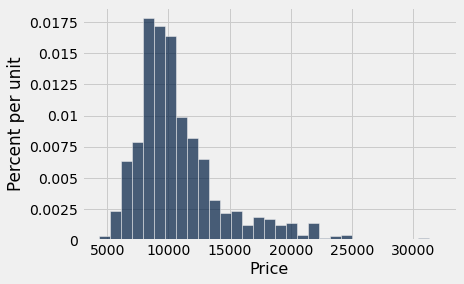

In [15]:
toyota_bins = np.arange(4300, 33000, 900)

toyota.hist('Price', bins = toyota_bins)

The histogram is right-skewed, unimodal, with possibly some outliers on the upper tail of the distribution.

## Question 2

Based on the shape of the histogram, compute and output the values of the appropriate `measure of center` and `measure of spread` of the distribution of prices of all used cars? Provide a reasonable reason for your choice of measures.

In [16]:
# Measure of center
measure_of_center = np.median(toyota.column('Price'))
measure_of_center

9900.0

In [17]:
# Measure of spread
measure_of_spread = percentile(75, toyota.column('Price')) - percentile(25, toyota.column('Price'))
measure_of_spread

3450

The choice of the median and the interquartile range is based on the skewness of the distribution. Skewed distributions have a tendency to have outliers which
can have undue influence on the mean and the standard deviation. The median and the interquartile range are both robust/resistant statistics that are not extremely affected by the 
skewness of the distribution.

## Question 3

Construct a 90% confidence interval for the median price of all used car prices who characteristics are provided in the data set. To receive full credit you should: 
   
   * take bootstrap samples from the original sample, 
   * find your bootstrap statistic, repeat 5000 times, and 
   * determine the upper and lower bounds of the confidence interval. 
   * provide an interpretation of the 90% confidence interval you just computed.

In [ ]:
toyo_car = make_array()

for i in np.arange(5000): # Number of simulations required.
    bootstrap = toyota.sample() # take bootstrap samples from the original sample
    bootstrap_median =np.median(bootstrap.column('Price')) # find your bootstrap statistic, repeat 5000 times
    toyo_car = np.append(toyo_car, bootstrap_median)
    
lower_bound = percentile(5, toyo_car) # determine the lower bound of the confidence interval. 
upper_bound = percentile(95, toyo_car) # determine the upper bound of the confidence interval. 

lower_bound, upper_bound # Output the bounds of the confidence interval.

(9750.0, 9950.0)

We predict with 90% confidence that if samples are randomly drawn,
the unknown median price of all used cars lies between 9750.0 and 9950.0 Euros


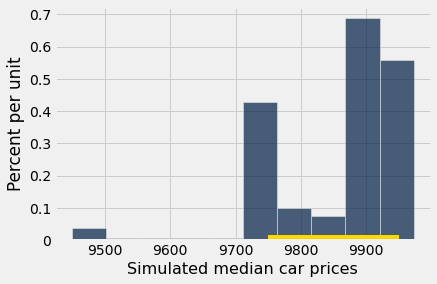

In [19]:
Table().with_column(
    'Simulated median car prices', toyo_car
).hist()

plots.plot([lower_bound, upper_bound], [0,0], color="gold", lw=10, zorder=1);
print("We predict with 90% confidence that if samples are randomly drawn,")
print("the unknown median price of all used cars lies between", np.round(lower_bound,2), "and", np.round(upper_bound,2), "Euros")

We are $90 \%$ confident that the interval $(9750,9950)$ would contain the true median price. This does not mean that there is a 90% probability that the true value of the median is in this interval; rather, if we repeated this process many times, then 90% of the time, the intervals generated would contain the true median price.

## Question 4

Before personally visiting the car dealership, an individual assumed that the typical price of a used car at this dealership is about $\$8000$. 

Does this confidence interval provide evidence in support of this assumption at the 0.05 significance level?  Why do you so answer?

# Possible Correct Answer 1

"If you are testing whether or not the population median is a particular value x=8000, and you use the 5% cutoff for the p-value, then you will reject the null hypothesis if x is not in your 95% confidence interval for the median." This excerpt from our textbook and previous assessment work shows that we need a 95% confidence interval to test the given claim at  at the 0.05 significance level. 

See Lab 8, Question 4. 

- The 90% confidence interval computed above does not contain 8000 as a possible value of the population median. Thus if we use a p-value cutoff of 10%, we reject the individual's claim . In this problem, we are required to use a p-value cutoff of 0.05. This requires a 95% confidence interval which is wider than a 90% confidence interval for the population median. This might either widen out to include the 8000 or not. Thus we are unable to tell using the 90% confidence interval. 

# Possible Correct Answer 2

Because we have the simulated values of the statistic in this problem, we can compute the required lower and upper bounds of a 95% confidence interval.

The bounds are provided below based on the results of the simulation above. 

In [20]:
lower_bound_95 = percentile(2.5, toyo_car) # determine the lower bound of the confidence interval. 
upper_bound_95 = percentile(97.5, toyo_car) # determine the upper bound of the confidence interval. 

lower_bound_95, upper_bound_95 # Output the bounds of the confidence interval.

(9600.0, 9950.0)

- Since 8000 does NOT fall in the 95% confidence interval computed below, we reject the individual's claim that the typical price of a used car at this dealership is about $\$8000$.

## Question 5

Depending on the model of a car and the year of manufacture, used car prices can vary. As of August 2004, the manager of the car dealership where the `ToyotaCorolla.csv` data set was collected has Toyota cars with different years of manufacture(in particular, cars manufactured in the categories of the years 1998 - 2004). To meet different customer needs for used cars, the manager of the Toyota car dealership offering the promotion claims that he maintains the following inventory proportions of Toyota cars by `Year of manufacture(MFG_Year)`: 1998(22%), 1999(28%), 2000(11%), 2001(8%), 2002(10%), 2003(9%), and 2004(12%). 

The goal of this problem is to assess whether the actual observed proportions of toyota cars in the `ToyotaCorolla.csv` data set, grouped by `Year of manufacture(MFG_Year)`, supports the manager's claim or represents a significant departure from the claim. To do this, we need to simulate multiple proportions of the cars under the model of random selection and see what the simulations predict. In other words, our goal is to test the null hypothesis that the current dealership inventory is randomly selected from a population with the multiple categories of `Year of manufacture(MFG_Year)` and having the proportions stated above. We need a statistic that will help us assess whether or not the model of random selection is supported by the data.

Use the following hypotheses:

**Null Hypothesis:** The proportions of used Toyota cars by year of manufacture shows that the data is a random sample drawn from a population having the proportions claimed by the manager.
    
**Alternative Hypothesis**: The proportions of used Toyota cars by year of manufacture `does not` show that the data is a random sample drawn from a population having the proportions claimed by the manager.

To receive full credit you should:

1. Choose an appropriate test statistic

2. Find the value of the observed test statistic

3. Find your simulated test statistic, and repeat at least **500 times**

4. Plot your simulated test statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! Only python code that align with functions and methods taught in class are acceptable. 

First, create a table of the observed proportions in the dataset and the claims proportions below `summary_table`.

In [21]:
tyt_grp_prop = toyota.group('Mfg_Year')
tyt_grp = tyt_grp_prop.with_columns(
    'Proportions', tyt_grp_prop.column('count')/sum(tyt_grp_prop.column('count')),
    'Claims', make_array(0.22, 0.28, 0.11, 0.08, 0.10, 0.09, 0.12)
)

tyt_grp


Mfg_Year,count,Proportions,Claims
1998,196,0.272981,0.22
1999,221,0.307799,0.28
2000,112,0.155989,0.11
2001,96,0.133705,0.08
2002,43,0.0598886,0.1
2003,37,0.051532,0.09
2004,13,0.0181058,0.12


In [22]:
summary_table = tyt_grp.drop('count')
summary_table

Mfg_Year,Proportions,Claims
1998,0.272981,0.22
1999,0.307799,0.28
2000,0.155989,0.11
2001,0.133705,0.08
2002,0.0598886,0.1
2003,0.051532,0.09
2004,0.0181058,0.12


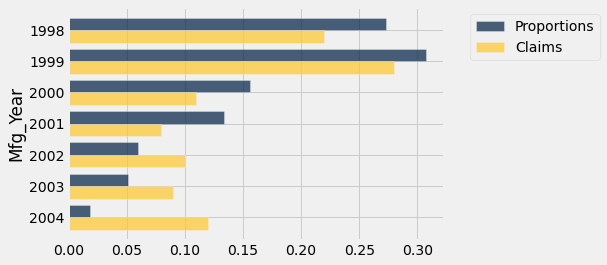

In [23]:
summary_table.barh('Mfg_Year')

In [24]:
# Under the model, this is the true distribution of toyota cars by year

model = summary_table.column('Claims')
model

array([ 0.22,  0.28,  0.11,  0.08,  0.1 ,  0.09,  0.12])

In [25]:
# Let's simulate a random draw of 718 cars from this distribution
simulated = sample_proportions(718, model)
simulated

array([ 0.23537604,  0.28551532,  0.11977716,  0.07520891,  0.07660167,
        0.07660167,  0.13091922])

In [26]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
summary_table_simulated = summary_table.with_column('Simulated', simulated)
summary_table_simulated

Mfg_Year,Proportions,Claims,Simulated
1998,0.272981,0.22,0.235376
1999,0.307799,0.28,0.285515
2000,0.155989,0.11,0.119777
2001,0.133705,0.08,0.0752089
2002,0.0598886,0.1,0.0766017
2003,0.051532,0.09,0.0766017
2004,0.0181058,0.12,0.130919


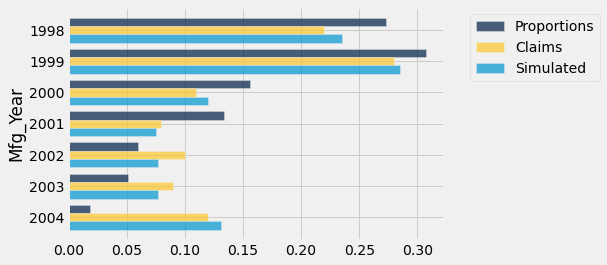

In [27]:
summary_table_simulated.barh('Mfg_Year')

1. Choose an appropriate test statistic

In [28]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

2. Find the value of the observed test statistic

In [29]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(summary_table.column('Proportions'), summary_table.column('Claims'))
obsvd_tvd

0.18047353760445681

3. Find your simulated test statistic, and repeat at least **500 times**

In [30]:
def simulated_tvd():
    return tvd(sample_proportions(718, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

4. Plot your simulated test statistics in a histogram along with the observed test statistic

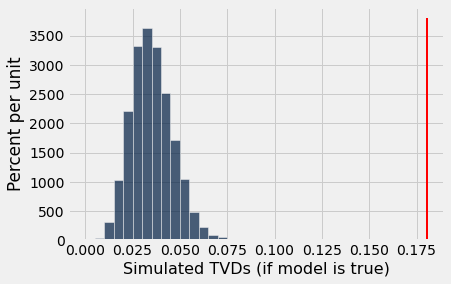

In [31]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, 0.15, .005)

Table().with_column(title, tvds).hist(bins = bins)
plots.plot([obsvd_tvd, obsvd_tvd], [0, 38], color='red', lw=2);

5. Calculate the p-value based off of your observed and simulated test statistics

In [32]:
p_value = sum(tvds >= obsvd_tvd) / len(tvds)
p_value

0.0

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

With the p-value(0.0) less than a p-value cutoff(say, of 0.05), we reject the hull hypothesis that contains the claim of the manager of the car dealership. Thus, the simulation based on the data analyzed provides sufficient evidence in favor of the claim that the sample proportions of used Toyota cars by year of manufacture `does not` show that the data is a random sample drawn from a population having the proportions claimed by the manager.

## Question 6

Are used, `sports-model` Toyota cars(_Sport_Model=1_) on the lot more expensive than Toyota cars that are not `sports-model`(_Sport_Model=0_)? 

Does this data suggest that the mean price of used, sports-model Toyota cars is higher than those that are not sports-model? The *Sport_ Model* variable in the data set is used to characterize where a Toyota car is a sports model or not. 

Perform a hypothesis test (at the 0.05 significance level) to examine this claim. For the test statistic, use the average price of sports model Toyota cars(_Sport_Model=1_) minus the average price of Toyota cars that are not of the sports model(_Sport_Model=0_). 

*Do not reinvent the wheel. You may do this in as many lines as needed, and may add cells as well. You can (should) use functions that we have used in class, homework, labs, or from the text! Only python code that align with functions and methods taught in class are acceptable.*

**To receive full credit you should:**

1. Choose an appropriate test statistic

2. Find the value of the observed test statistic

3. Shuffle the labels of the original sample, find your simulated test statistic, and repeat at least **1000 times**

4. Plot your simulated test statistics in a histogram along with the observed test statistic

5. Calculate the p-value based off of your observed and simulated test statistics

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

1. Choose an appropriate test statistic

In [33]:
# Define utility function for finding a value of the test statistic

def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

2. Find the value of the observed test statistic

In [34]:
sports_and_price = toyota.select('Sport_Model', 'Price')
sports_and_price.group('Sport_Model', np.average)

Sport_Model,Price average
0,10396
1,11586.4


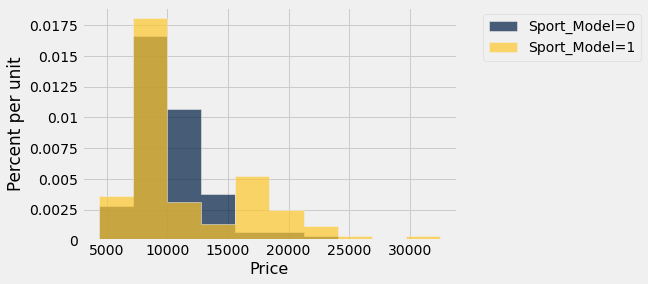

In [35]:
sports_and_price.hist('Price', group = 'Sport_Model')

In [36]:
observed_difference = difference_of_means(toyota, 'Price', 'Sport_Model')
observed_difference

1190.3203853211016

3. Shuffle the labels of the original sample, find your simulated test statistic, and repeat at least **1000 times**

In [37]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')  

In [38]:
one_simulated_difference(toyota, 'Price', 'Sport_Model')

100.6532844036683

In [39]:
differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(toyota, 'Price', 'Sport_Model')
    differences = np.append(differences, new_difference)

4. Plot your simulated test statistics in a histogram along with the observed test statistic

Observed Difference: 1190.3203853211016


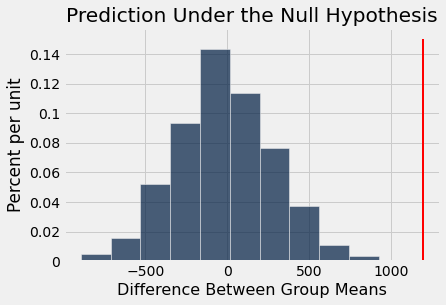

In [40]:
Table().with_column('Difference Between Group Means', differences).hist()

print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([observed_difference, observed_difference], [0, 0.0015], color='red', lw=2);


5. Calculate the p-value based off of your observed and simulated test statistics

In [41]:
p_value = sum(differences >= observed_difference) / len(differences)
p_value

0.0

6. Use the p-value to draw a conclusion and explain the conclusion using simple, non-technical language in the context of the problem with complete sentences

The p-value is equal to 0.0. Under the null hypothesis, the mean price of used, sports-model Toyota cars is about the same as those that are not sports-model. The alternative hypothesis is the hypothesis that the mean price of used, sports-model Toyota cars is higher than those that are not sports-model.

Because the p_value is very small, the observed value of the test statistic is quite far away from the heart of the simulated distribution centered at 0. By any reasonable cutoff(a p-value cutoff of 0.01 or 0.05) for what is “small”, the empirical P-value is small. So we end up rejecting the null hypothesis of randomness, and conclude the difference between the mean price of used, sports-model Toyota cars and non sports-model Toyota cars is too large to reflect chance variation alone.